<div dir=rtl>
بارم‌بندی:


*   پروژه: 10 نمره
*   پایانترم: 6 نمره
*   تمرین: 4 نمره
*   ارائه امتیازی: 1 نمره

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = (20, 10)

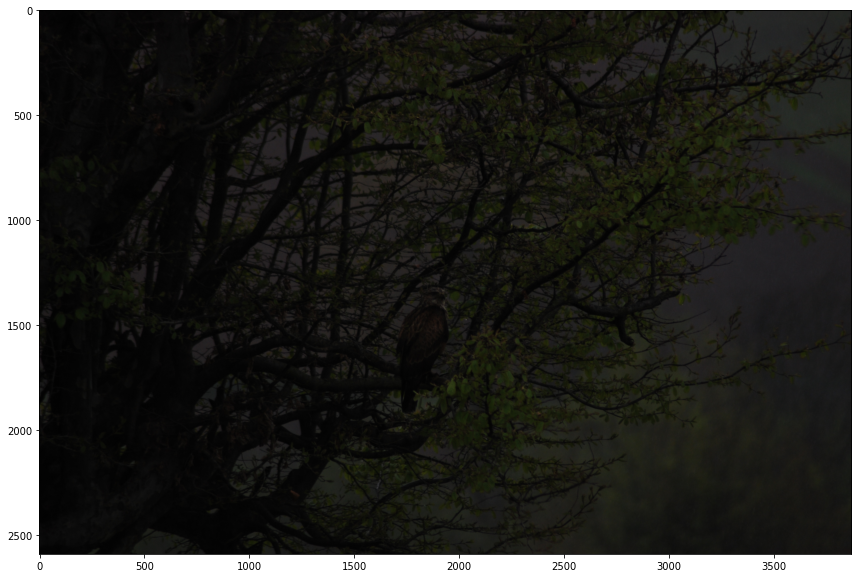

In [10]:
enhance1_original = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Contents/Enhance1.JPG')
enhance1_original = cv2.cvtColor(enhance1_original, cv2.COLOR_BGR2RGB)
plt.imshow(enhance1_original)
last_processed_image = enhance1_original

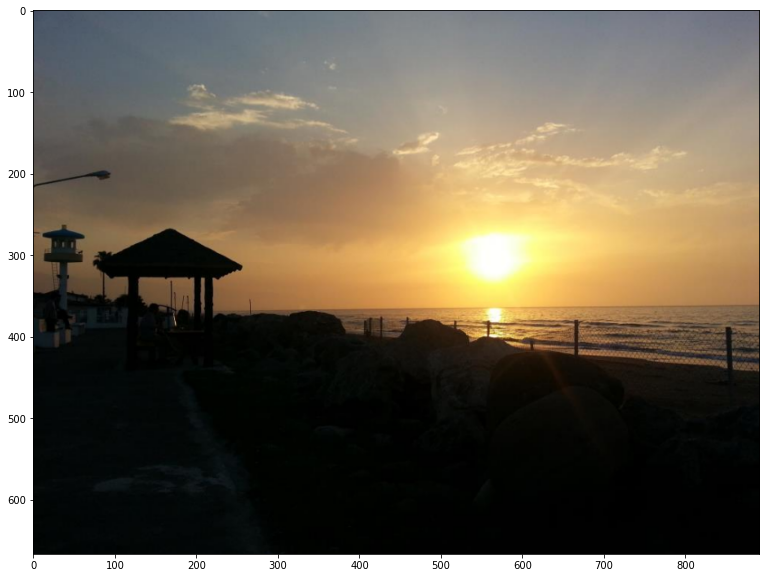

In [7]:
sunset_original = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Contents/sunset.png')
sunset_original = cv2.cvtColor(sunset_original, cv2.COLOR_BGR2RGB)
plt.imshow(sunset_original)
last_processed_image = sunset_original

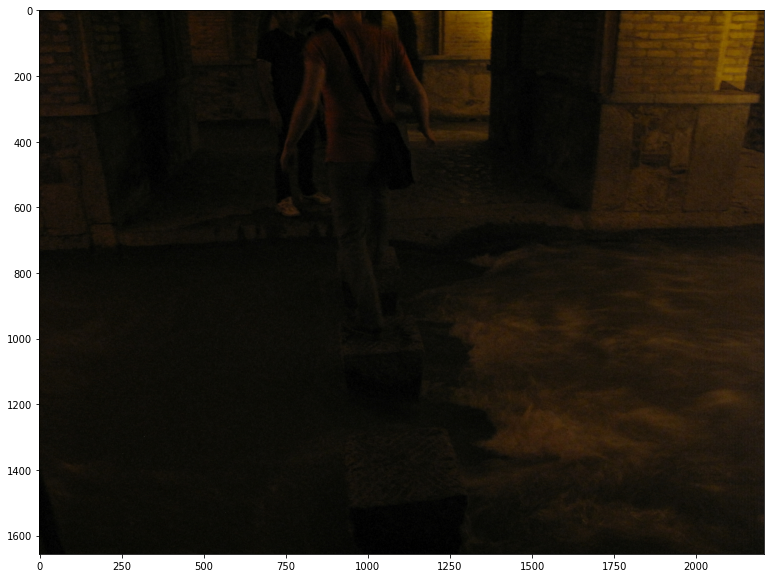

In [ ]:
dark_original = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Contents/Dark.jpg')
dark_original = cv2.cvtColor(dark_original, cv2.COLOR_BGR2RGB)
plt.imshow(dark_original)
last_processed_image = dark_original

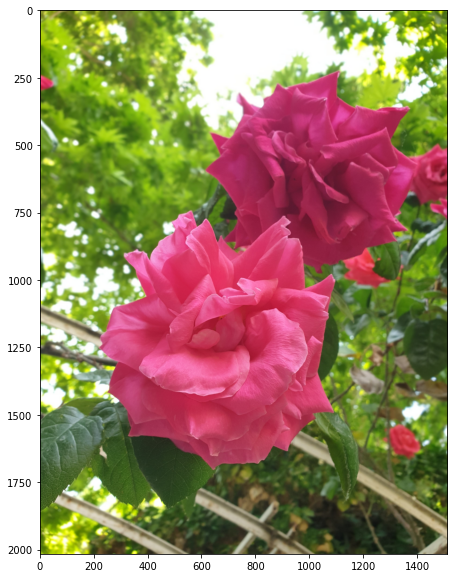

In [ ]:
pink_original = cv2.imread('/content/drive/MyDrive/Colab Notebooks/Contents/Pink.jpg')
pink_original = cv2.cvtColor(pink_original, cv2.COLOR_BGR2RGB)
plt.imshow(pink_original)
last_processed_image = pink_original

## define transformations (point operators):

### arbitrary transformation

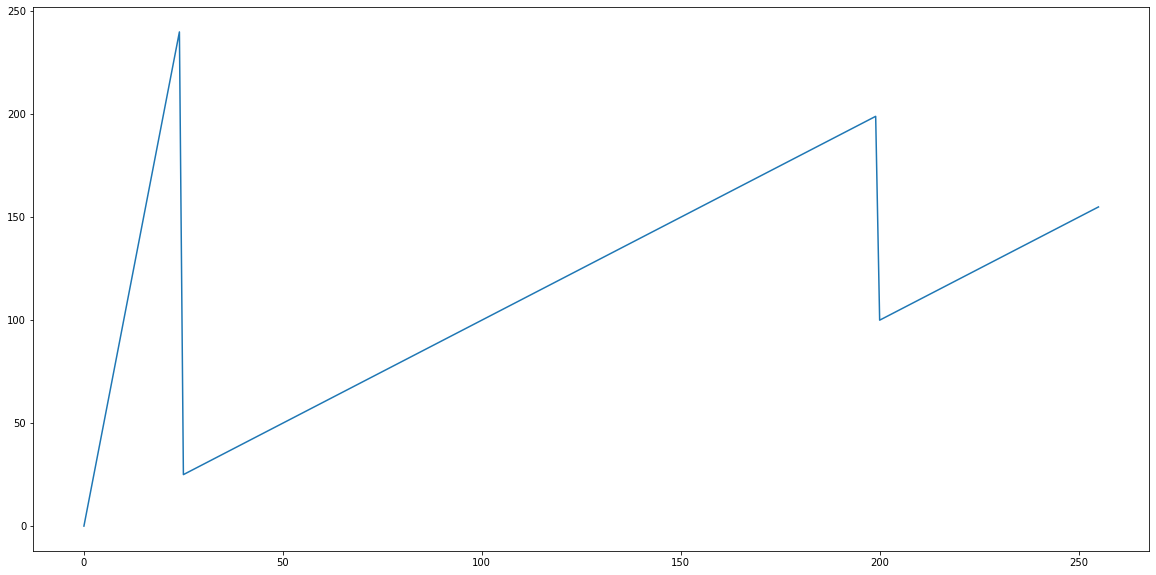

In [4]:
transformation = np.zeros(256)
for i in range(256):
    if i < 25:
        transformation[i] = 10 * i
    elif i < 200:
        transformation[i] = i
    else :
        transformation[i] = i - 100
plt.plot(range(256), transformation)

### log transformation
\begin{align}
        y = \frac{255 \, \log_{2}(1+\alpha\,x)}{\log_{2}(1 + 255α)}
\end{align}

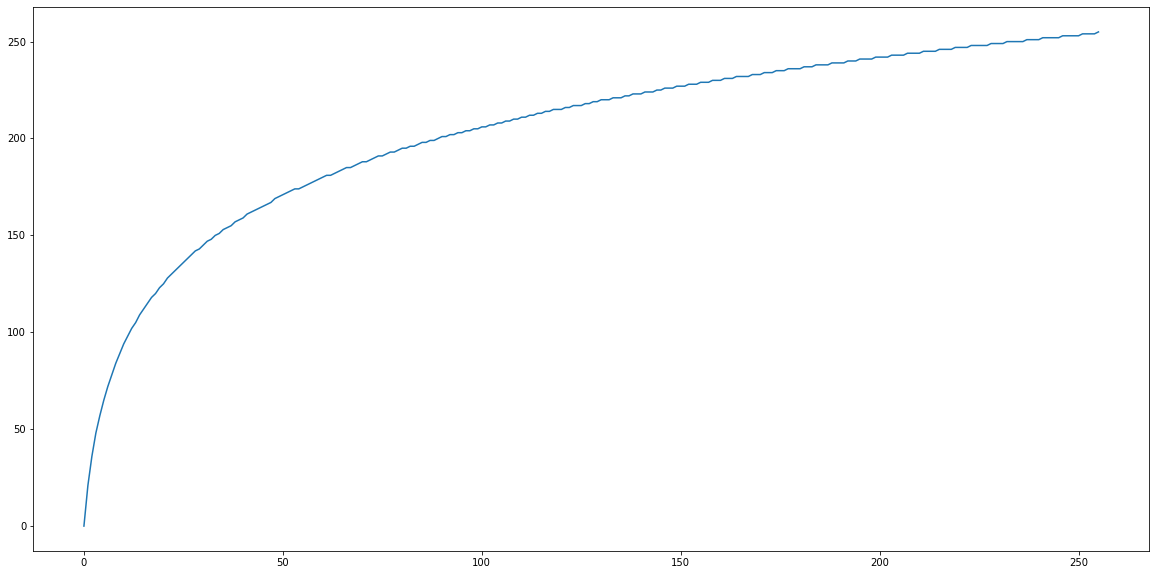

In [8]:
transformation = np.zeros(256)
α = 0.5 # 0.01, 0.1, 0.5, 1, 10, 50, 100
for i in range(256):
    transformation[i] = int(255 * np.log10(1+α * i) / np.log10(1 + 255*α))
plt.plot(range(256), transformation)


### Power law transformation:
\begin{align}
        y = 255(\frac{x}{255})^γ
\end{align}
e.g. gamma correction

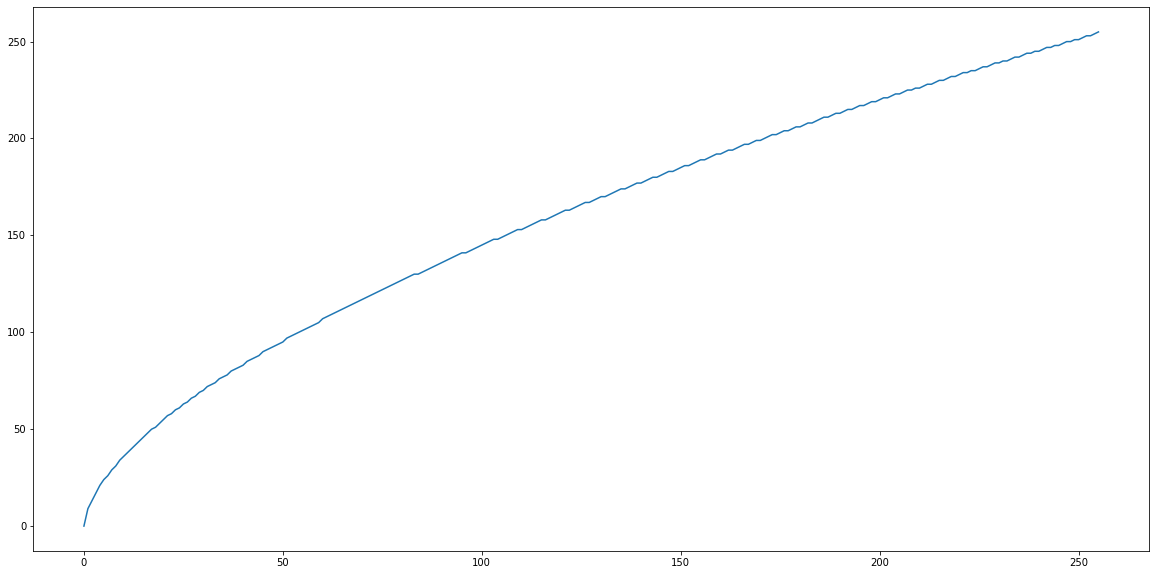

In [ ]:
transformation = np.zeros(256)
γ = 0.6 #0.1, 0.2, 0.4, 0.7, 2, 3, 8
for i in range(256):
    transformation[i] = int(255 * (i / 255)**γ)
plt.plot(range(256), transformation)

### negative transformation

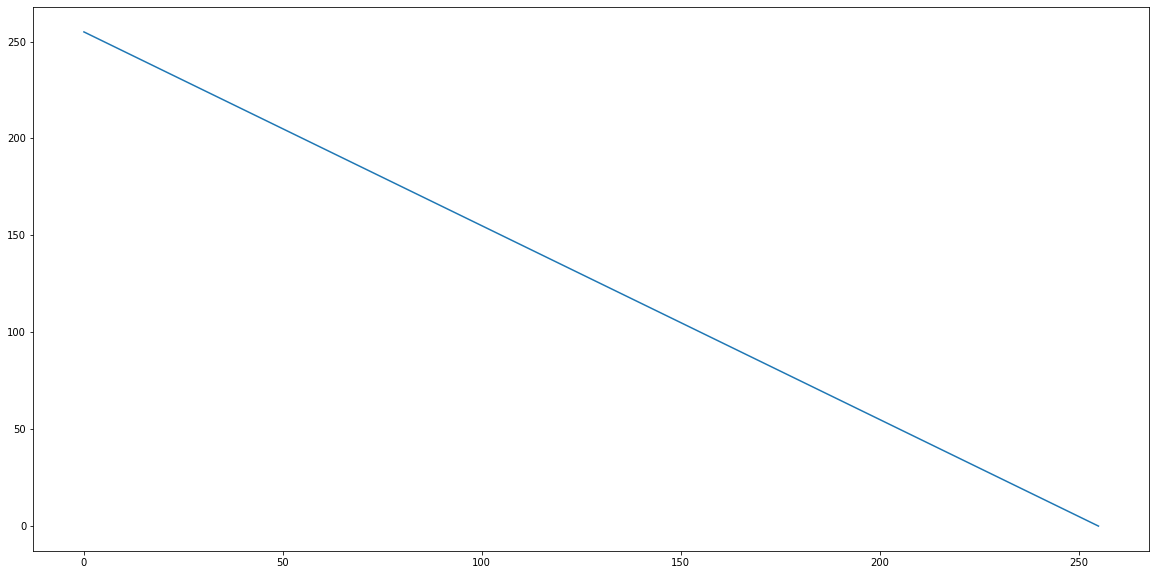

In [ ]:
transformation = np.zeros(256)
for i in range(256):
    transformation[i] = int(255 - i)
plt.plot(range(256), transformation)

## apply transformation

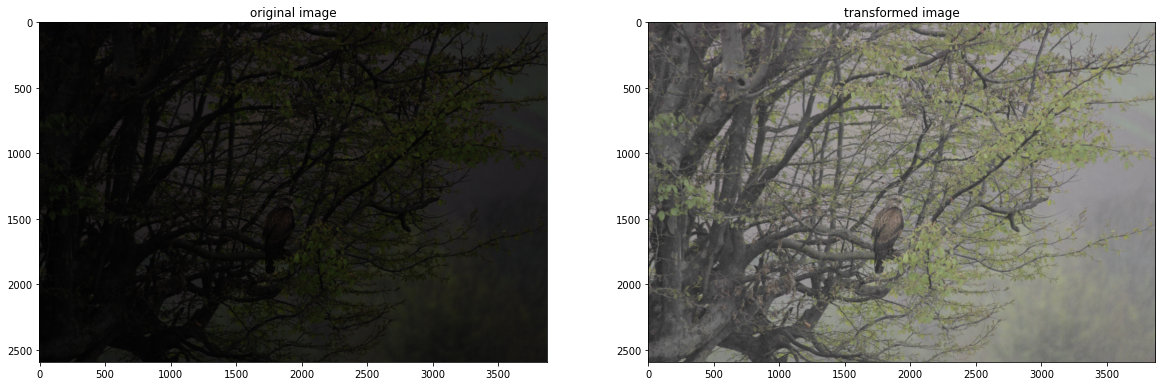

In [11]:
image_for_transformation = np.copy(last_processed_image)
transformed_image = np.zeros(shape=image_for_transformation.shape, dtype=np.uint8)
for i in range(image_for_transformation.shape[0]):
    for j in range(image_for_transformation.shape[1]):
        for k in range(image_for_transformation.shape[2]):
            transformed_image[i][j][k] = transformation[image_for_transformation[i][j][k]]
fig, axs = plt.subplots(1, 2)
axs[0].imshow(image_for_transformation)
axs[0].set_title("original image")
axs[1].imshow(transformed_image)
axs[1].set_title("transformed image")
last_processed_image = transformed_image

# Histogram Processing

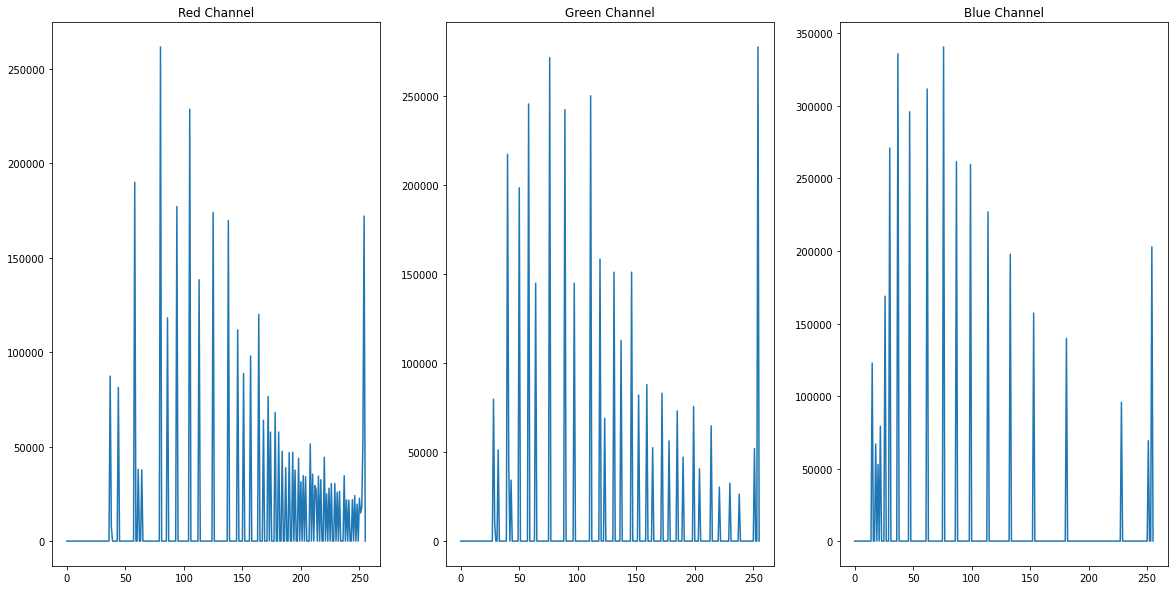

In [ ]:
def plot_hist():
    global last_processed_image
    fig, axs = plt.subplots(1, 3)
    axs[0].plot(range(256), cv2.calcHist([last_processed_image],[0],None,[256],[0,256]))
    axs[0].set_title("Red Channel")
    axs[1].plot(range(256), cv2.calcHist([last_processed_image],[1],None,[256],[0,256]))
    axs[1].set_title("Green Channel")
    axs[2].plot(range(256), cv2.calcHist([last_processed_image],[2],None,[256],[0,256]))
    axs[2].set_title("Blue Channel")
plot_hist()

## [Histogram matching](https://en.wikipedia.org/wiki/Histogram_matching)

In [ ]:
from skimage.exposure import match_histograms
final_image = match_histograms(last_processed_image, pink_original, multichannel=True)
# source : https://scikit-image.org/docs/stable/auto_examples/color_exposure/plot_histogram_matching.html

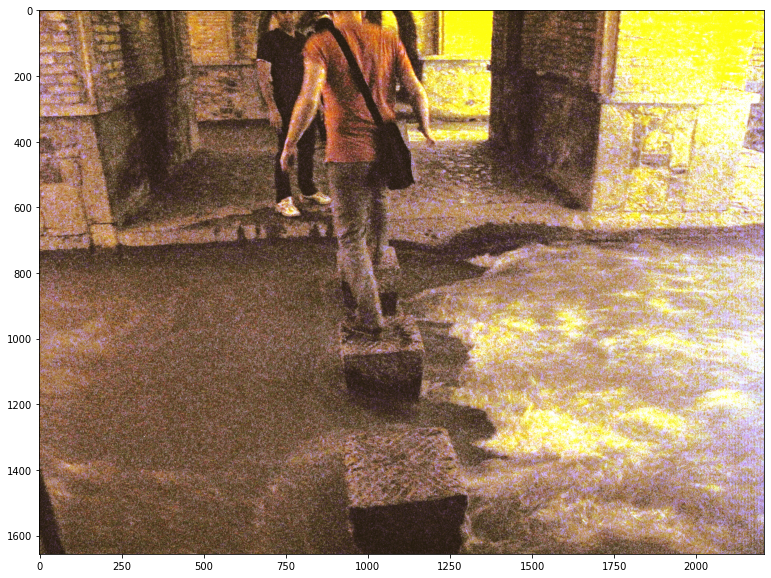

In [ ]:
final_image = final_image.astype(np.uint8)
plt.imshow(final_image)
last_processed_image = final_image

# References:


*   Gonzalez: Sec 3.3, Histogram processing
*   Szeliski: Sec 3.1, Point Operators

